<center><h1>Widget Tutorial</h1></center>

Jupyter Widgets demos and explanations.  

The purpose of this notebook is to show how to tie widgets to data in an effort to make them interactive in a useful way, and lay the groundwork towards building data-based applications.  After this, we'll talk more specifically about Jupyter Dashboards and managing those but in the end it is really just a way to format the display of widgets so this part is much more important.

Comparable Systems:

- [Google's Data Studio](https://www.google.com/analytics/data-studio/gallery/)
- [Amazon Quicksight](https://quicksight.aws/)
- [Microsoft PowerBI](https://powerbi.microsoft.com/en-us/)
- [RStudio Shiny](https://shiny.rstudio.com/)
- [Superset](https://github.com/airbnb/superset)

Some relevant docs:

- [Jupyter Widgets](https://ipywidgets.readthedocs.io/en/latest/index.html)

        pip install ipywidgets
        jupyter nbextension enable --py widgetsnbextension

- [Jupyter Dashboard](https://github.com/jupyter/dashboards)

        pip install jupyter_dashboards
        jupyter dashboards quick-setup --sys-prefix

- [Jupyter Dashboard Server](https://github.com/jupyter-incubator/dashboards_server)

In [60]:
%run -m ipy_startup
%run -m ipy_plotly
%matplotlib inline
import ipywidgets as widgets
from IPython.display import display, HTML

<hr>
<center><h2>Widget Basics</h2></center>

### Triggering Actions

In [61]:
w = widgets.Button(description='Do Nothing')
w

In [62]:
def handler(b):
    print('Clicked!')

w = widgets.Button(description='Do Something')
w.on_click(handler)
w

Clicked!
Clicked!
Clicked!


### Stateful Values

In [63]:
w = widgets.IntSlider(description='Value:', value=150, min=100, max=200)
w

In [64]:
w.value

152

In [66]:
w.value = 185

### Observation Model

In [67]:
w = widgets.ToggleButtons(
    options=['Slow', 'Regular', 'Fast'],
    description='Speed:'
)
w

In [68]:
w = widgets.ToggleButtons(
    options=['Slow', 'Regular', 'Fast'],
    description='Speed:'
)

def handler(change):
    print(change['old'], '->', change['new'])

w.observe(handler, names='value', type='change')
w

Slow -> Regular
Regular -> Fast
Fast -> Slow


### Inter-Widget Interactivity

In [69]:
w1 = widgets.Dropdown(options=['Option 1', 'Option 2', 'Option 3'], value='Option 2')
w2 = widgets.IntSlider(continuous_update=False)
w3 = widgets.Text()

def handler(change):
    w3.value = 'Option = "{}", Number = {}'.format(w1.value, w2.value)

w1.observe(handler, names='value', type='change')
w2.observe(handler, names='value', type='change')

display(w3, w1, w2)

<hr>
<center><h2>Widget Layout</h2></center>

In [70]:
widgets.HBox([widgets.Text('Hello'), widgets.Text('World')])

In [71]:
widgets.VBox([widgets.Text('Hello'), widgets.Text('World')])

In [72]:
w1 = widgets.Dropdown(options=['Option 1', 'Option 2', 'Option 3'], value='Option 2')
w2 = widgets.IntSlider()
w3 = widgets.Textarea()

def handler(change):
    w3.value = 'Option = "{}", Number = {}'.format(w1.value, w2.value)
w1.observe(handler, names='value', type='change')
w2.observe(handler, names='value', type='change')

widgets.HBox([
    widgets.VBox([w1, w2]),
    w3
])

### Page Layout Controls

In [73]:
display(widgets.Text('Some Text 1'), widgets.Text('Text 2'), widgets.Text('Text 3'))

In [74]:
w_list = [widgets.Text('Some Text 1'), widgets.Text('Text 2'), widgets.Text('Text 3')]
w_tab = widgets.Tab(children=w_list)
w_tab

In [75]:
w_list = [widgets.Text('Some Text 1'), widgets.Text('Text 2'), widgets.Text('Text 3')]
w_tab = widgets.Tab(children=w_list)
[w_tab.set_title(i, w.value) for i, w in enumerate(w_list)]
w_tab

In [76]:
w_list = [widgets.Text('Some Text 1'), widgets.Text('Text 2'), widgets.Text('Text 3')]
w_acc = widgets.Accordion(children=w_list)
[w_acc.set_title(i, w.value) for i, w in enumerate(w_list)]
w_acc

<hr>
<center><h2>Output Widgets</h2></center>

In [77]:
n = 1000
x = np.arange(n)
d = pd.Series(2.*np.cos(x / 30.) + np.random.randn(n))
d.head()

0    1.562232
1    0.593993
2    1.896066
3    2.459189
4    0.547919
dtype: float64

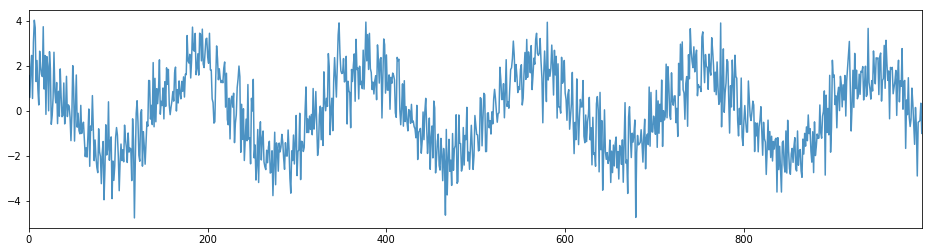

In [78]:
d.plot(figsize=(16,4), alpha=.8)

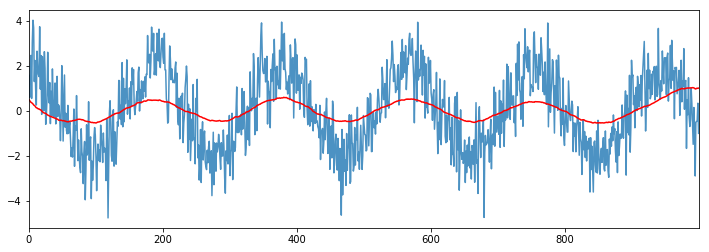

In [79]:
def plot_data(smooth_window):
    d.plot(figsize=(12,4), alpha=.8)
    d.rolling(window=smooth_window, min_periods=1, center=True).mean().plot(c='red')
plot_data(150)

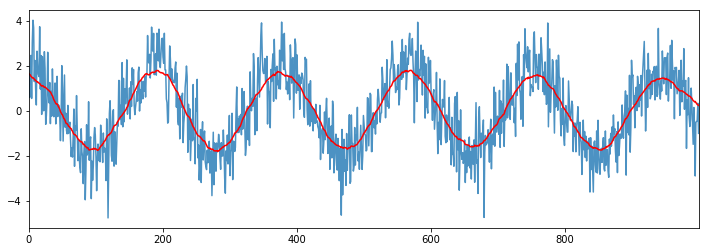

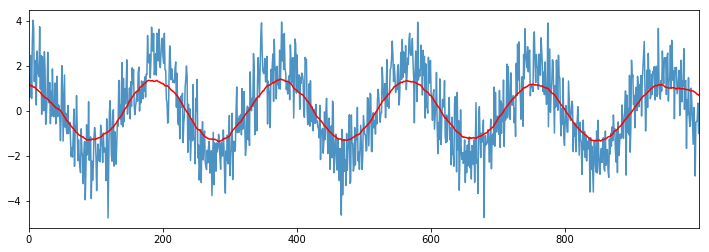

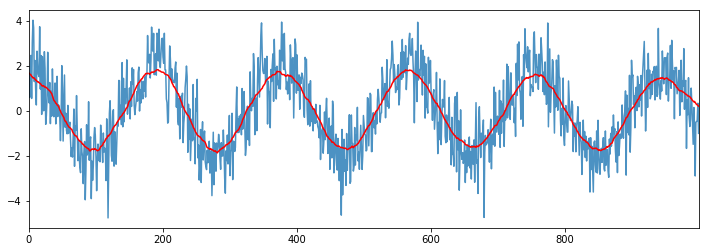

In [81]:
w1 = widgets.IntSlider(min=1, max=200, continuous_update=False)
w2 = widgets.Output()

def handler(change):
    with w2:
        plot_data(w1.value)

w1.observe(handler, names='value', type='change')
widgets.HBox([w1, w2])

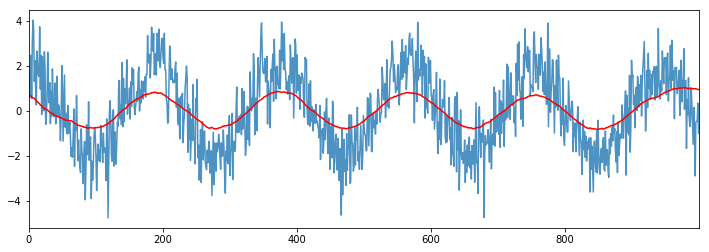

In [82]:
from IPython.display import clear_output
w1 = widgets.IntSlider(min=1, max=200, continuous_update=False)
w2 = widgets.Output()

def handler(change):
    clear_output(True)
    with w2:
        plot_data(w1.value)

w1.observe(handler, names='value', type='change')
widgets.HBox([w1, w2])

### "Interact" Shortcut

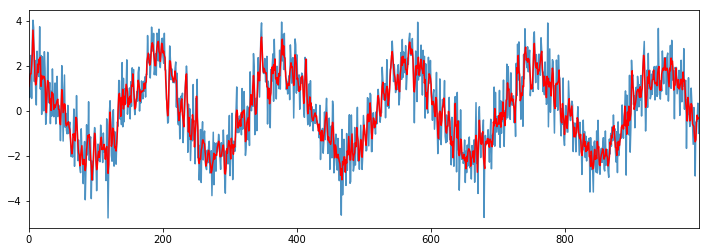

In [84]:
@widgets.interact(smooth_window=3)
def interact_plot(smooth_window):
    plot_data(smooth_window)

## HTML Output

In [85]:
def plot_html_data(smooth_window):
    d_smooth = d.rolling(window=smooth_window, min_periods=1, center=True).mean()
    traces = [
        go.Scatter(x=x, y=d, name='Raw Data'),
        go.Scatter(x=x, y=d_smooth, name='Rolling Mean')
    ]
    fig = go.Figure(data=traces, layout=dict(width=800))
    plty.offline.iplot(fig)
plot_html_data(150)

In [87]:
w1 = widgets.IntSlider(min=1, max=200, continuous_update=False)
w2 = widgets.Output()

# This is really important to avoid things moving around during input changes
w2.layout.height='600px'

def handler(change):
    w2.clear_output()
    with w2:
        plot_html_data(w1.value)

w1.observe(handler, names='value', type='change')
widgets.VBox([w1, w2])

<hr>
<center><h2>Widget-Based "Applications"</h2></center>

In [88]:
# Initialize and format the whole page
w1 = widgets.IntSlider(min=1, max=200)
w2 = widgets.Button(description='Refresh')
w3 = widgets.Output()
w3.layout.height='600px'

app = widgets.VBox([
    widgets.HBox([w1, w2]),
    w3
])

# Create a single button-initiated refresh routine for the whole application
def refresh_app(button):
    # Clear existing outputs
    w3.clear_output()
    
    # Create new outputs
    with w3:
        plot_html_data(w1.value)
w2.on_click(refresh_app)

# Simulate a single click of the "refresh" button using all initial settings
refresh_app(None)

# Launch the app
app